In [1]:
import numpy as np
import pandas as pd
import pickle
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Times New Roman'

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

****************************************

In [4]:
with open("cleaned_tweets.pkl", "rb") as f1:
    tweet_df = pickle.load(f1)
tweet_df.head(2)

,id,label,tweet,tweet_new,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.00,@user when a father is dysfunctional and is s...,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0.00,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, lyft, credit, use, cause, offer, whee...","[thank, lyft, credit, use, caus, offer, wheelc...","[thanks, lyft, credit, use, cause, offer, whee..."


1. Создайте мешок слов с помощью sklearn.feature_extraction.text.CountVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.
Исключим стоп-слова с помощью stop_words='english'. 
Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью CountVectorizer.get_feature_names().

In [5]:
c_vectorizer = CountVectorizer(analyzer='word',
                               max_df=0.9,
                               max_features=1000,
                               stop_words="english"
                              )

In [6]:
# для 'tweet_stemmed'
values = c_vectorizer.fit_transform(tweet_df['tweet_stemmed'].apply(lambda x: ' '.join(x)))
feature_names = c_vectorizer.get_feature_names()
df_stemmed_cv = pd.DataFrame(values.toarray(), columns=feature_names)

In [7]:
# для 'tweet_lemmatized'
values = c_vectorizer.fit_transform(tweet_df['tweet_lemmatized'].apply(lambda x: ' '.join(x)))
feature_names = c_vectorizer.get_feature_names()
df_lemmatized_cv = pd.DataFrame(values.toarray(), columns=feature_names)

In [8]:
display(df_stemmed_cv.head(2), df_lemmatized_cv.head(2))

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,...,yeah,year,yesterday,yo,yoga,york,young,youtub,yr,yummi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,able,absolutely,account,act,action,actor,actually,adapt,add,adventure,...,year,yes,yesterday,yo,yoga,york,young,youtube,yr,yummy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**************

2. Создайте мешок слов с помощью sklearn.feature_extraction.text.TfidfVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.
Исключим стоп-слова с помощью stop_words='english'.
Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью TfidfVectorizer.get_feature_names().


In [9]:
tfidf_vectorizer = TfidfVectorizer(analyzer='word',
                               max_df=0.9,
                               max_features=1000,
                               stop_words="english"
                              )

In [10]:
# для 'tweet_stemmed'
values = tfidf_vectorizer.fit_transform(tweet_df['tweet_stemmed'].apply(lambda x: ' '.join(x)))
feature_names = tfidf_vectorizer.get_feature_names()
df_stemmed_tfidf = pd.DataFrame(values.toarray(), columns=feature_names)

In [11]:
# для 'tweet_lemmatized'
values = tfidf_vectorizer.fit_transform(tweet_df['tweet_lemmatized'].apply(lambda x: ' '.join(x)))
feature_names = tfidf_vectorizer.get_feature_names()
df_lemmatized_tfidf = pd.DataFrame(values.toarray(), columns=feature_names)

In [12]:
display(df_stemmed_tfidf.head(2), df_lemmatized_tfidf.head(2))

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,...,yeah,year,yesterday,yo,yoga,york,young,youtub,yr,yummi
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


,able,absolutely,account,act,action,actor,actually,adapt,add,adventure,...,year,yes,yesterday,yo,yoga,york,young,youtube,yr,yummy
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


******************

3. Проверьте ваши векторайзеры на корпусе который использовали на вебинаре, составьте таблицу метод векторизации и скор который вы получили (в методах векторизации по изменяйте параметры что бы добиться лучшего скора) обратите внимание как падает/растёт скор при уменьшении количества фичей, и изменении параметров, так же попробуйте применить к векторайзерам PCA для сокращения размерности посмотрите на качество сделайте выводы

In [13]:
# Загружаем данные
data = open('corpus').read()
labels, texts = [], []
for i, line in enumerate(data.split("\n")):
    content = line.split()
    labels.append(content[0])
    texts.append(" ".join(content[1:]))

# создаем df
trainDF = pd.DataFrame()
trainDF['text'] = texts
trainDF['label'] = labels
# label encoder
encoder = LabelEncoder()
trainDF['label'] = encoder.fit_transform(trainDF['label'])
trainDF['label'].value_counts()
trainDF.head(5)

,text,label
0,Stuning even for the non-gamer: This sound tra...,1
1,The best soundtrack ever to anything.: I'm rea...,1
2,Amazing!: This soundtrack is my favorite music...,1
3,Excellent Soundtrack: I truly like this soundt...,1
4,"Remember, Pull Your Jaw Off The Floor After He...",1


In [14]:
def test_vec_params(model,
                    data: pd.DataFrame,
                    vec_type: 'str' = "tf_idf",
                    max_features: int = 1000,
                    max_df: float = 0.9,
                    pca: int = None,
                    ) -> float:

    params = {'max_features': max_features,
              'max_df': max_df,
              'analyzer': 'word',
              'stop_words': "english"
              }
    
    if vec_type == "tf_idf":
        vectorizer = TfidfVectorizer()
    if vec_type == "count":
        vectorizer = CountVectorizer()
    vectorizer.set_params(**params)
    vectorizer.fit(data['text'])  # text vectorizer

    train_x, valid_x, train_y, valid_y = train_test_split(
        data['text'], data['label'], random_state=13)  # train/test split
    features_name = vectorizer.get_feature_names()
    
    train_x =  pd.DataFrame(vectorizer.transform(train_x).toarray(), columns=features_name)
    valid_x =  pd.DataFrame(vectorizer.transform(valid_x).toarray(), columns=features_name)
    
    if pca:
        dim_reducer = PCA(n_components=pca, random_state=13)
        train_x =  dim_reducer.fit_transform(train_x)
        valid_x =  dim_reducer.transform(valid_x)
    
    model.fit(train_x, train_y)
    predictions = model.predict(valid_x)
    acc = accuracy_score(valid_y, predictions)

    return acc

In [15]:
model = LogisticRegression()

In [16]:
vec_types = ['tf_idf', 'count']
max_features_num = [100, 300, 500, 700, 1000, 1500, 2000, 3000]
max_df_num = np.linspace(0.1, 1, 10)
PCA_dims = [10, 20, 40, 60, 80, 100, 150, 300]

# TEST параметров

## Зависимость от max_features

In [17]:
results = {}
for vec_type in vec_types:
    result_list = []
    for max_features in max_features_num:
        accuracy = test_vec_params(model,
                                   trainDF,
                                   vec_type=vec_type,
                                   max_features=max_features,
                                   max_df=0.9,
                                   )
        result_list.append(accuracy)
    results[vec_type] = result_list

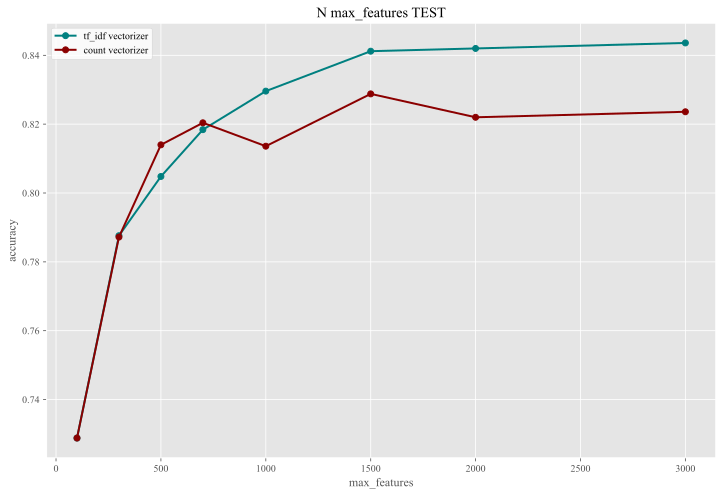

In [18]:
plt.figure(figsize=(12, 8))
plt.xlabel('max_features')
plt.ylabel('accuracy')
plt.title('N max_features TEST')
plt.plot(max_features_num, results['tf_idf'], color='teal',
         marker='o',  linewidth=2, label='tf_idf vectorizer')
plt.plot(max_features_num, results['count'], color='darkred',
         marker='o',  linewidth=2, label='count vectorizer')
plt.legend(loc='best', facecolor='white')
plt.show()

## Зависимость от max_df

In [19]:
results = {}
for vec_type in vec_types:
    result_list = []
    for max_df in max_df_num:
        accuracy = test_vec_params(model,
                                   trainDF,
                                   vec_type=vec_type,
                                   max_features=1500,
                                   max_df=max_df,
                                   )
        result_list.append(accuracy)
    results[vec_type] = result_list

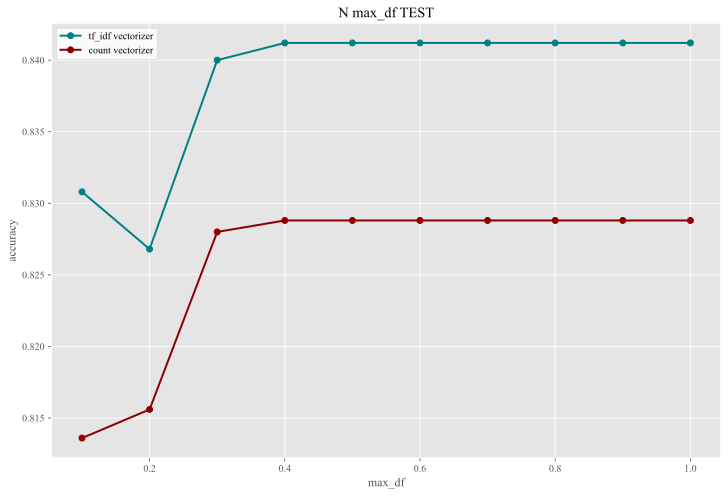

In [20]:
plt.figure(figsize=(12, 8))
plt.xlabel('max_df')
plt.ylabel('accuracy')
plt.title('N max_df TEST')
plt.plot(max_df_num, results['tf_idf'], color='teal',
         marker='o',  linewidth=2, label='tf_idf vectorizer')
plt.plot(max_df_num, results['count'], color='darkred',
         marker='o',  linewidth=2, label='count vectorizer')
plt.legend(loc='best', facecolor='white')
plt.show()

## Зависимость от размерности РСА

In [21]:
results = {}
for vec_type in vec_types:
    result_list = []
    for pca in PCA_dims:
        accuracy = test_vec_params(model,
                                   trainDF,
                                   vec_type=vec_type,
                                   max_features=None,
                                   max_df=0.9,
                                   pca=pca 
                                   )
        result_list.append(accuracy)
    results[vec_type] = result_list

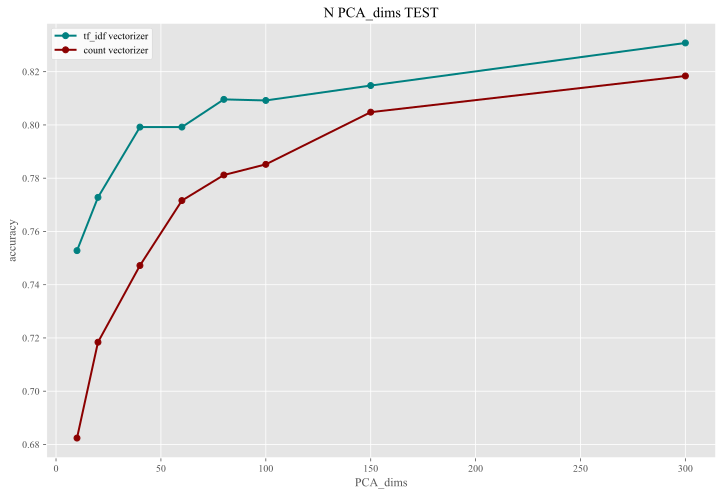

In [22]:
plt.figure(figsize=(12, 8))
plt.xlabel('PCA_dims')
plt.ylabel('accuracy')
plt.title('N PCA_dims TEST')
plt.plot(PCA_dims, results['tf_idf'], color='teal',
         marker='o',  linewidth=2, label='tf_idf vectorizer')
plt.plot(PCA_dims, results['count'], color='darkred',
         marker='o',  linewidth=2, label='count vectorizer')
plt.legend(loc='best', facecolor='white')
plt.show()

**Вывод**
* При увеличении **max_features** в векторайзерах - растет accuracy(что не удивительно как-то). На данном датасете tf-idf векторизация показала лучше, чем count результаты. 
* Значение **max_df > 0.4** больше не улучшает предсказания (до 0.4 accuracy растет, дальше = const)
* **PCA** позволяет получить б**о**льшую точность на значительно меньшей размерности данных, но теряется возможность интерпретации результатов.